<a href="https://colab.research.google.com/github/teodoragrubor/projekatPPPO/blob/master/prviDeo_vezbe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prvi deo projekta je uradjen tako sto su pracene vezbe i tema koja je na njima obradjivanja - Image Segmentation u okviru dela Medical Segmentation. Medicinska segmentacija slika sluzi kako bi pomogla lekarima da dodju do relevantnih zakljucaka koji bi pomogli u otkrivanju i resavanju problema. Tema ovog projekta je ultrazvuk i odredjivanje mogucih permutacija na njemu. Segmentacija sluzi kako bismo sliku podelili u odredjene regione gde svaki region sadrzi odredjene piksele. 

In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 88kB/s 


In [ ]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as scs
from sklearn.mixture import GaussianMixture
from PIL import Image

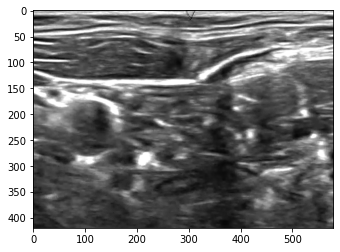

In [ ]:
fname = '/content/drive/MyDrive/#8/train/10_6.tif'
image = Image.open(fname).convert("L")
image_data = np.asarray(image)
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
np.random.seed(1)
g = GaussianMixture(n_components=4, covariance_type='diag', tol=0.01, max_iter=100, 
                n_init=1, init_params='kmeans')

In [ ]:
g.fit(image_data[0].flatten().reshape(-1, 1)) 

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.01, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
def plot_pdf_models(x, g):
    we = g.weights_
    mu = g.means_
    si = np.sqrt(g.covariances_)
    for ind in range(0,we.shape[0]): 
        plt.plot(x,we[ind]*scs.norm.pdf(x, mu[ind], si[ind]),linewidth=4)

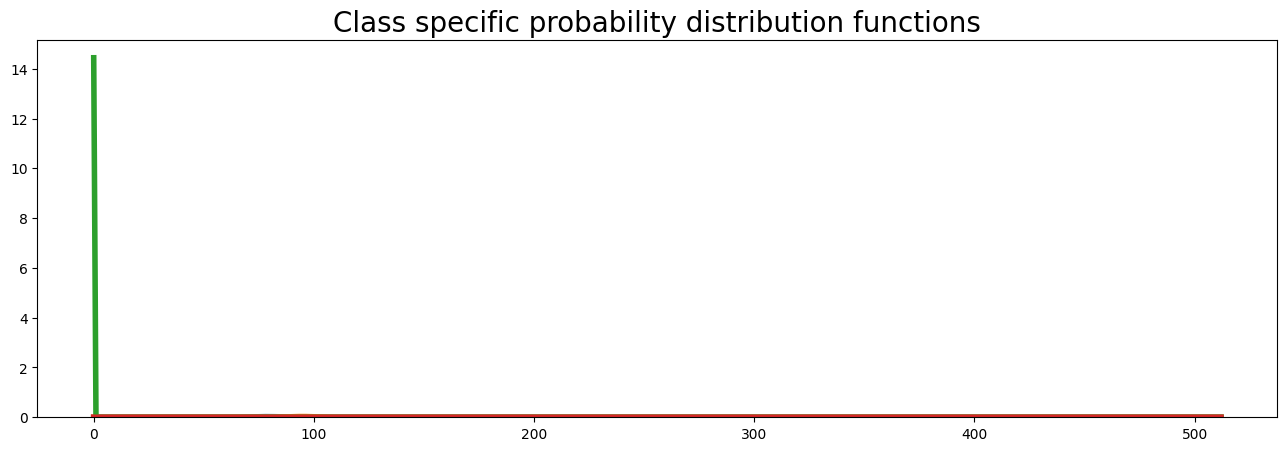

In [ ]:
x = np.linspace(0,512,500)
plt.figure(figsize=(16, 5), dpi=100)
plot_pdf_models(x,g)
plt.hist(image_data.flatten(), bins=int(512/6), range=(0, 512), density=True)
plt.title('Class specific probability distribution functions',fontsize=20)
plt.show()

(500,) (500, 4)


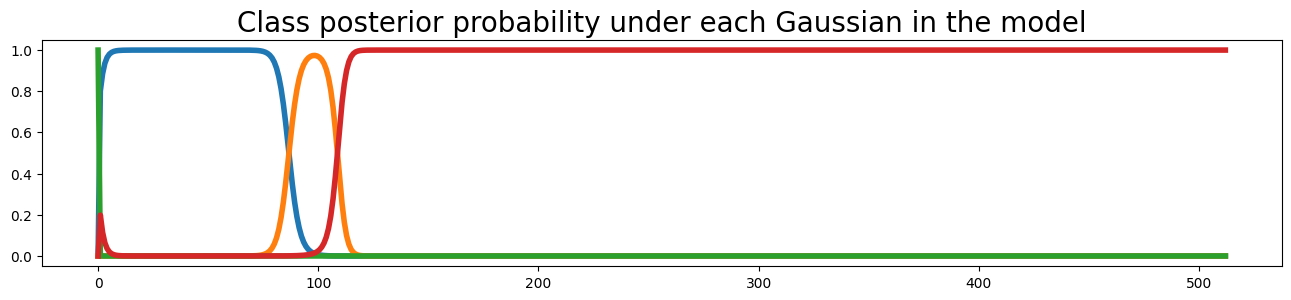

In [ ]:
plt.figure(figsize=(16, 3), dpi=100)
print(x.shape, g.predict_proba(x.reshape(-1,1)).shape)
plt.plot(x,g.predict_proba(x.reshape(-1,1)), linewidth=4)
plt.title('Class posterior probability under each Gaussian in the model',fontsize=20)
plt.show()

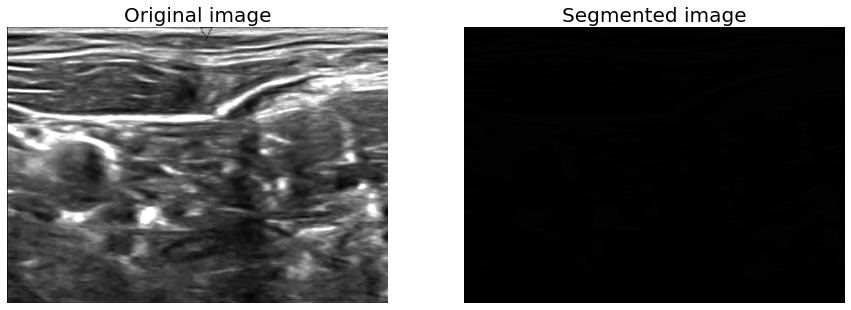

In [ ]:
label_data = g.predict(image_data.flatten().reshape(-1, 1)) #.flatten()) 
label_data = label_data.reshape(image_data.shape)
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(image_data, cmap='gray', vmin=0, vmax=255), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(label_data, cmap='gray', vmin=0, vmax=255), plt.axis('off'), plt.title('Segmented image', size=20)
plt.show()

In [ ]:
!pip install tifffile 
!pip install imagecodecs 

In [ ]:
import keras
print(keras.__version__)
import tifffile as tiff 
from keras.utils.vis_utils import plot_model
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray, gray2rgb
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot 

2.5.0


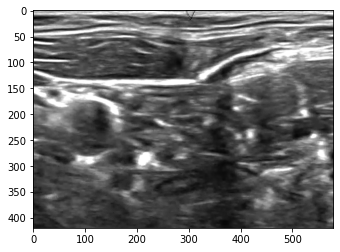

AttributeError: ignored

In [ ]:

fname = '/content/drive/MyDrive/#8/train/10_6.tif'
image = Image.open(fname).convert("L")
image_data = np.asarray(image)
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.show()

fname = (fname-fname.mean()) / fname.std()
x[:,1:,:,:] = np.reshape(fname, (1,1,240,240))


In [ ]:


x = np.zeros((1,2,240,240),np.float32)
ultrazvuk = resize((rgb2gray(tiff.imread('/content/drive/MyDrive/#8/test/99.tif'))), (240,240))
real = resize(rgb2gray(imread('/content/drive/MyDrive/#8/train/1_1.tif')), (240,240))
ultrazvuk = (ultrazvuk-ultrazvuk.mean()) / ultrazvuk.std()
x[:,1:,:,:] = np.reshape(ultrazvuk, (1,1,240,240))
print(ultrazvuk)

pred_full = model.predict(x)
pred_full = np.reshape(pred_full, (240,240))
predikcija = 0.2*gray2rgb(ultrazvuk) + 0.4*np.array([0.25,1,0.25])*gray2rgb(pred_full) + 0.4*np.array([1,0.25,0.25])*gray2rgb(real)

plt.figure(figsize=(19,20))
plt.gray()
plt.subplots_adjust(0,0,1,0.95,0.01,0.05)
plt.subplot(221), plt.title('Ultrazvuk', size=25), plt.axis('off'), plt.imshow(T2)
plt.subplot(223), plt.title('Real', size=25), plt.axis('off'), plt.imshow(real)
plt.subplot(224), plt.title('Prediction', size=25), plt.axis('off'), plt.imshow(predikcija)
colors, labels = ['#A76161', '#FFFFB2'], ['GT', 'Pred']
patches = [ mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors)) ]
# Stavite oznake u legendu
plt.legend(handles=patches, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, prop={'size':25}, frameon=True, shadow=True)
plt.show()

SyntaxError: ignored